In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, roc_auc_score, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")


data = data.sample(frac=1).reset_index(drop=True)


X = data.drop(columns=['CLASS'])
y = data['CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

In [3]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [5]:
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize XGBoost with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, random_state=42)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier.fit(X_train_encoded, y_train)

# Predict probabilities for the test data
y_test_pred_prob = best_xgb_classifier.predict_proba(X_test_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, best_xgb_classifier.predict(X_test_encoded))
precision = precision_score(y_test, best_xgb_classifier.predict(X_test_encoded))
f1 = f1_score(y_test, best_xgb_classifier.predict(X_test_encoded))
logloss = log_loss(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC AUC Score:", roc_auc)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Accuracy: 0.7426841574167508
Precision: 0.7489711934156379
F1 Score: 0.7405900305188199
Log Loss: 0.5258133135743221
ROC AUC Score: 0.8177099031435577


In [6]:
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 0.9}


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
import xgboost as xgb
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")


data = data.sample(frac=1).reset_index(drop=True)


X = data.drop(columns=['CLASS'])
y = data['CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

xgb_classifier = xgb.XGBClassifier(colsample_bytree=0.9, learning_rate=0.05, max_depth=3,n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, subsample=0.8,random_state=42)

In [5]:
xgb_classifier.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

True Positive Rate (TPR): 0.7465346534653465
False Positive Rate (FPR): 0.2674897119341564
False Negative Rate (FNR): 0.25346534653465347
True Negative Rate (TNR): 0.7325102880658436
Accuracy: 0.739656912209889
Recall 0.7465346534653465
Precision: 0.7435897435897436
F1 Score: 0.7450592885375494
Log Loss: 0.5386042898411278
ROC AUC Score: 0.8047671433810049


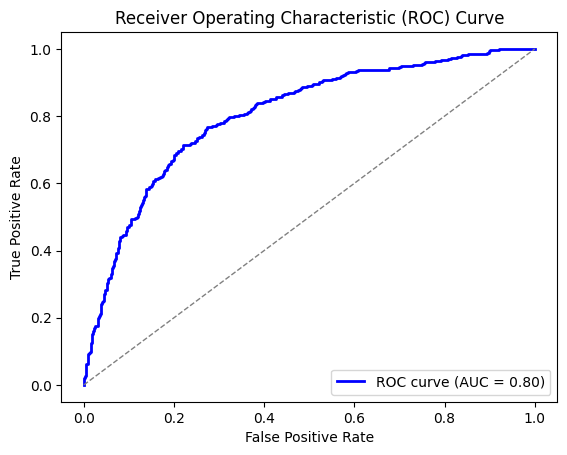

In [6]:
y_test_pred_prob = xgb_classifier.predict_proba(X_test_encoded)
y_test_pred =xgb_classifier.predict(X_test_encoded)

conf_matrix = confusion_matrix(y_test, y_test_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

print("Accuracy:", accuracy)
print("Recall", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[356 130]
 [128 377]]


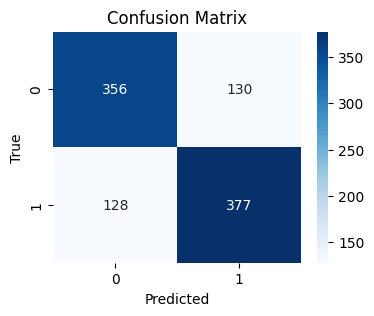

In [7]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)

In [12]:
y_pred_prob_new = xgb_classifier.predict_proba(X_new_encoded)

In [13]:
import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('xgb_CAT_lulc3_method_with_probabilities.csv', index=False)

In [8]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = xgb_classifier.predict_proba(X_new_encoded)
import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('xgb_NEWSHING_lulc3_method_with_probabilities.csv', index=False)